## Богатов Антон Юрьевич
### Лабораторная работа 6
### Вариант 4
### Задания 6.1.4, 6.2.2, 6.6.4, 6.8.2 и 6.9.4

### Задача 6.1.4
##### Условие:

Вычислить значение интеграла $I=\int_{1}^{1.44} P_n(x) dx$, где $P_n(x)=\sum_{i=0}^{n} c_ix^i$, с помощью квадратурных формул трапеций и Симпсона для элементарного отрезка интегрирования. Оценить величину погрешности. Применяя те же квадратурные формулы для составного отрезка интегрирования, вычислить интеграл $I$ с точностью $0.0001$. Предварительно оценить шаг интегрирования, при котором достигается заданная точность.

##### Порядок решения задачи:
1. Вычислить значение интеграла $I$ аналитически.
2. Задать многочлен $P_n(x)$. Вычислить значение интеграла $I$ по формулам трапеций и Симпсона, считая отрезок $[1, 1.44]$ элементарным отрезком интегрирования.
3. Найти абсолютные погрешности результатов.
4. Используя выражение для остаточных членов интегрирования, оценить шаги интегрирования, при которых величина погрешности каждой квадратурной формулы будет меньше 0.0001.
5. Вычислить значения интеграла по составной квадратурной формуле с найденным шагом.
6. Найти абсолютные погрешности результатов.

In [1]:
import numpy as np

In [15]:
a = 1
b = 1.44

Аналитическое решение:
$\int_{1}^{1.44} (0.1-0.1x+x^2+x^3+x^4) dx = 2.51562$

In [21]:
answer_a = 2.51562

In [16]:
def p(x):
    c = np.array([0.1, -0.1, 1, 1, 1])
    return np.sum(c * [x**i for i in range(c.shape[0])])

def trapezoidal_method(f, a, b):
    return (b - a) * (f(a) + f(b)) / 2

def simpson_method(f, a, b):
    return (b - a) * (f(a) + f(b) + 4*f((a + b) / 2.)) / 6

In [27]:
answer_tr = trapezoidal_method(p, a, b)
answer_s = simpson_method(p, a, b)
print ('Метод трапеций - ответ:',  answer_tr, ', абсолютная погрешность:',abs(answer_tr - answer_a))
print('Метод Симпсона - ответ:', answer_s, ', абсолютная погрешность:',abs(answer_s - answer_a))

Метод трапеций - ответ: 2.7093882111999994 , абсолютная погрешность: 0.1937682111999992
Метод Симпсона - ответ: 2.515753621333333 , абсолютная погрешность: 0.00013362133333272297


$$\max_{x \in [1,1.44]} \lvert \frac{d^3f}{dx^3} \rvert = \max_{x \in [1,1.44]} \lvert 24x+6 \rvert = 40.56$$

In [59]:
print('Оценка шага для метода трапеций:', round(np.power(12 * 0.0001 / (b - a) / 35.5232, 1/2), 4))
print('Оценка шага для метода Симпсона:', round(np.power(180 * 0.0001 / (b - a) / 40.56, 1/4), 4))

Оценка шага для метода трапеций: 0.0088
Оценка шага для метода Симпсона: 0.1782


In [60]:
n_tr = np.ceil((b-a)/0.0088).astype(int)
n_s = np.ceil((b-a)/0.1782).astype(int)
n_tr, n_s

(50, 3)

In [140]:
# Для метода Симпсона берем 4 шага
def trapezoidal(f, a, b, n):
    x_grid = np.linspace(a, b, n+1)[1:][:-1]
    return (b-a)/(2*n)*(f(a)+f(b)+2*np.sum([f(x) for x in x_grid]))

def simpson(f, a, b, n):
    x_grid = np.linspace(a, b, n+1)[1:][:-1]
    return (b-a)/(3*n)*(f(a)+f(b)+2*np.sum([f(x) for x in x_grid[1::2]])+4*np.sum([f(x) for x in x_grid[::2]]))

res_tr = trapezoidal(p, a, b, 50)
res_s = simpson(p, a, b, 4)
print ('Метод трапеций - ответ:',  res_tr, ', абсолютная погрешность:', abs(res_tr - answer_a))
print('Метод Симпсона - ответ:', res_s, ', абсолютная погрешность:', abs(res_s - answer_a))

Метод трапеций - ответ: 2.5156939197550314 , абсолютная погрешность: 7.39197550312376e-05
Метод Симпсона - ответ: 2.515624780533333 , абсолютная погрешность: 4.78053333274886e-06


### Задача 6.2.2
##### Условие:

Вычислить интегралы $I_k=\int_{a}^{b} P_k(x) dx$, где $P_k(x)=\sum_{i=0}^{n} c_ix^i$, $k = 0, 1, ..., 5$ аналитически и используя квадратурную формулу, указанную в индивидуальном варианте, с шагом $h = (b - a) / 2$. Для многочленов какой степени используемая квадратурная формула точна и почему? Оценить погрешность интегрирования по правилу Рунге.

In [39]:
a2 = -1
b2 = 0
h = 0.5
def p2(x):
    c2 = np.array([0.4, 0.3, 0.2, 0.1, 2, 1, -1, 0])
    return np.sum(c * [x**i for i in range(c.shape[0])])

Аналитическое решение:
$\int_{-1}^{0} (0.4-0.3x+0.2x^2+0.1x^3+2x^4+x^5-x^6) dx = 0.682143$

In [40]:
answer_a2 = 0.682143

In [99]:
def midpoint_method(f, a, b, h):
    return h * (f(a) + f(a+h) + f(b))

def midpoint2(f, a, b):
    h = (b-a)/4
    return h * (f(a) + f(a+h) + f(a+2*h) + f(a+3*h) + f(b))

In [94]:
# def midpoint(f, a, b, n):
#     h = (b - a) / n
#     result = 0
#     for i in range(n):
#         result += f(a + h * (i + 0.5))
#     result *= h
#     return result

In [95]:
# answer_mid = midpoint(p, a2, b2, 2)
# answer_mid2 = midpoint(p, a2, b2, 4)
# answer_mid, answer_mid2

In [100]:
answer_m = midpoint_method(p, a2, b2, h)
answer_m2 = midpoint2(p, a2, b2)
answer_m, answer_m2

(0.8187500000000001, 0.611328125)

In [93]:
print ('Метод центральных прямоугольников - ответ:',  answer_m, ', абсолютная погрешность:', abs(answer_m - answer_a2))

Метод центральных прямоугольников - ответ: 0.8187500000000001 , абсолютная погрешность: 0.13660700000000003


In [102]:
print ('Метод центральных прямоугольников - погрешность по правилу Рунге:', 1/3 * abs(answer_m2 - answer_m))

Метод центральных прямоугольников - погрешность по правилу Рунге: 0.06914062500000002


### Задача 6.6.4
##### Условие:

Вычислить значение интеграла $I$ из задачи $6.1$, используя квадратурную формулу Гаусса с одним, двумя, тремя, четырьмя узлами. Определить абсолютную погрешность результата. Построить гистограмму зависимости погрешности от числа узлов. Убедиться, что квадратурные формулы Гаусса с $N+1 (N=0,1,2,3)$ узлом точны для многочленов $1, t, ..., t^m$, где $m = 2N + 1$.

In [106]:
def Gauss(f, a, b, n):
    coefs = [[[0,2]], [[-0.577350269189626, 1], [0.577350269189626, 1]], 
             [[-0.77459666929954, 0.55555555555556], [0, 0.88888888888888], [0.77459666929954, 0.55555555555556]], 
             [[-0.861136311594052, 0.347854845137454], [-0.339981043584856, 0.652145154862546], 
              [0.339981043584856, 0.652145154862546], [0.861136311594052, 0.347854845137454]]]
    return (b-a)/2*np.sum([cs[1]*f((a+b)/2+(b-a)/2*cs[0]) for cs in coefs[n]])

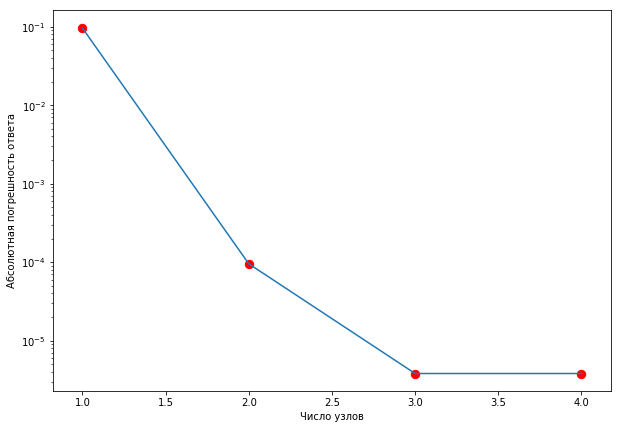

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
n_grid = np.arange(1, 5, 1)
errors = [np.abs(Gauss(p, a, b, i)-answer_a) for i in np.arange(0, 4, 1)]

plt.figure(figsize=(10,7))
plt.plot(n_grid, errors)
plt.scatter(n_grid, errors, c='r', s = 70)
plt.xlabel('Число узлов')
plt.ylabel('Абсолютная погрешность ответа')
plt.yscale('log')

Квадратурные формулы точны

### Задача 6.8.2
##### Условие:

Используя указанную в индивидуальном варианте квадратурную формулу, вычислить двойной интеграл $\int_{a}^{b} \int_{c}^{d}f(x,y) \,dx\,dy$ от функции двух переменных $f(x, y)$ по прямоугольной области $D=\{(x,y), x \in [a,b], y \in [c,d]\}$ с точностью 0.001.

In [142]:
a8, b8, c, d = -1, 1, 0, 2

def f(x, y):
    return (y+np.sin(x))*(y**2*x+1)

$\int_{-1}^{1} \int_{0}^{2} (y+\sin(x))(y^2x+1) \,dx\,dy = 3.99335$

In [90]:
res_a = 3.99335

### Задача 6.9.4
##### Условие:

Для интегрального уравнения $y(x)-\lambda \int_{a}^{b} k(x,t) y(t) \,dt = f(x)$ составить таблицу значений решения с тремя верными значащими цифрами с постоянным шагом $h=(b-a)/10$, используя указанную в индивидуальном варианте квадратурную формулу. Построить график решения.

In [129]:
def k(x,t):
    return (x+t)/(10+t)

def f(x):
    return 1+2*x

lmbd = 0.5
a9 = 0
b9 = 1
n = 10
h9 = (b9-a9)/n

In [136]:
x_grid = np.arange(a9, b9, h9)
B = np.array([f(x) for x in x_grid])
print(x_grid)
A = np.array([[-lmbd * k(x_grid[i], x_grid[j]) for j in range(n)] for i in range (n)])
A += np.eye(n, n)
# A.shape, B.shape
y = np.linalg.solve(A, B)
y

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


array([1.89074938, 2.25930419, 2.627859  , 2.9964138 , 3.36496861,
       3.73352342, 4.10207823, 4.47063303, 4.83918784, 5.20774265])

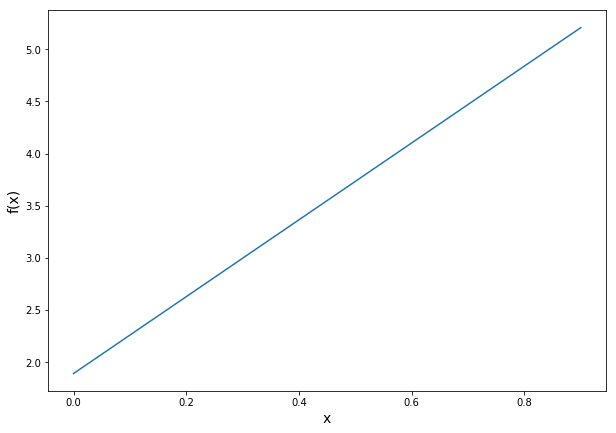

In [138]:
plt.figure(figsize=(10,7))
plt.plot(x_grid, y)
plt.xlabel('x', size=14)
plt.ylabel('f(x)', size=14);